In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('text')  # Let's view our circuit (text drawing is required for the 'Initialize' gate due to a known bug in qiskit)

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [4]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [5]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
result = execute(qc,backend).result() # Do the simulation, returning the result

In [6]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


In [7]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

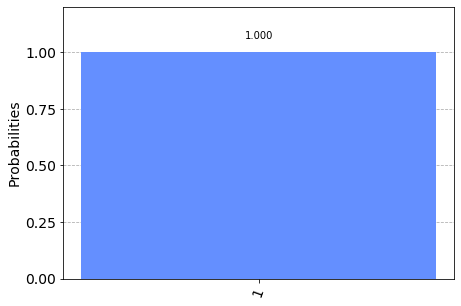

In [8]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q>

In [11]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


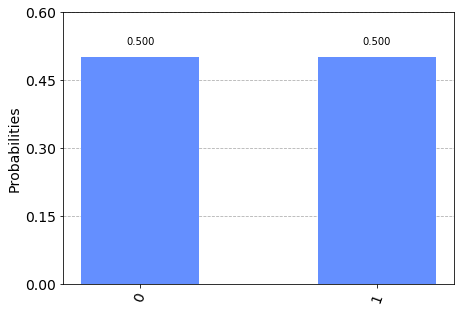

In [12]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

Quick Exercise
## 1. Create a state vector that will give a  $1/3$  probability of measuring  |0⟩ 

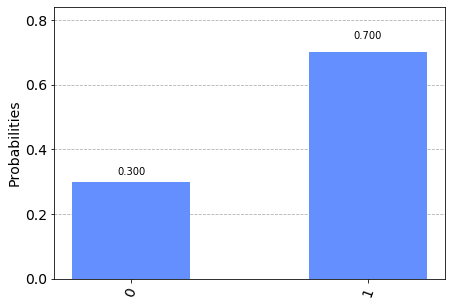

In [13]:
initial_state = [sqrt(0.3), 1j*sqrt(0.7)]  # Define state |q>
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

## 2. Create a different state vector that will give the same measurement probabilities.

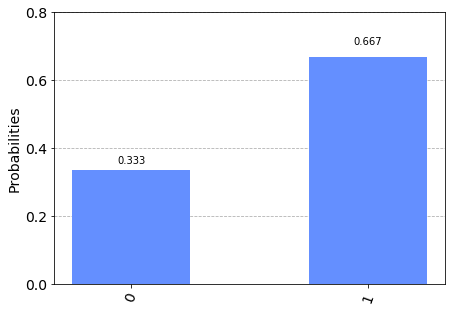

In [14]:
init_state_2 = [sqrt(1/3), 1j*sqrt(1-1/3)]
qc2 = QuantumCircuit(1)
qc2.initialize(init_state_2, 0)
results = execute(qc2, backend).result().get_counts()
plot_histogram(results)

In [15]:
qc = QuantumCircuit(1)
init_values = [0. + 1j/sqrt(2), 1/sqrt(2) + 0.j]
qc.initialize(init_values, 0)
qc.draw('text')

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [16]:
state = execute(qc, backend).result().get_statevector()
print("Qubit state = " + str(state))

Qubit state = [0.        +0.70710678j 0.70710678+0.j        ]


In [17]:
qc.measure_all()
qc.draw('text')

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

In [18]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+1.j 0.+0.j]


$<1|1>$ = $<\Psi|\Psi>$

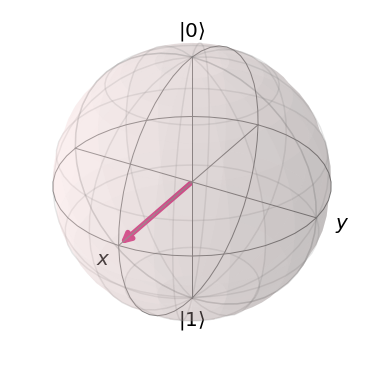

In [46]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
# for i in range(1,100):
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates